# 분류 실습 - 캐글 신용카드 사기 검출

## 언더샘플링과 오버샘플링
언더샘플링: 많은 데이터세트를 적은 데이터세트 수준으로 감소시키는 방법. 정상 레이블을 데이터를 이상 레이블 데이터 수준으로 줄여버리면 과도하게 정상 레이블로 학습/예측하는 부작용을 개선할 수 있지만 정상 레이블의 경우 제대로 된 학습을 수행할 수 없는 문제가 발생할 수 있음  
오버샘플링: 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법. 동일한 데이터를 단순히 증가하는 방법은 과적합이 되기 때문에 원본 데이터의 피처 값들을 아주 약간만 변경하여 증식. 대표적으로 SMOTE방법

## 데이터 일차 가공 및 모델 학습/예측/평가

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


V로 시작하는 피처는 알수가 없다  
Time피처는 데이터 생성 관련된 작업용 속성으로 큰 의미가 없으므로 제거  
Amount피처는 신용카드 트랜잭션 금액을 의미  
Class는 레이블로 0이면 정상, 1이면 사기 트랜잭션

In [3]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
from sklearn.model_selection import train_test_split
#인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis = 1, inplace = True)
    return df_copy

In [5]:
#get_train_test_dataset()은 get_preprocessed_df()를 호출한 뒤 학습 피처/레이블 데이터셋, 테스트 피처/레이블 데이터셋을 반환
#테스트데이터를 전체의 30%인 Stratified 방식으로 추출해 학습 데이터셋과 테스트 데이터셋의 레이블 값 분포도를 서로 동일하게 만듦
def get_train_test_dataset(df=None):
    #인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    #DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    #train_test_split()으로 학습과 테스트 데이터 분할, stratify = y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0, stratify = y_target)
    #학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [6]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts() / y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts() / y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


## 로지스틱 회귀를 이용해 신용카드 사기 여부를 예측

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC AUC 스코어 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}')

In [8]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

#3장에서 사용한 get_clf_eval()함수를 이용해 평가 수행
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85280    15]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8585, 재현율: 0.6149, F1: 0.7165, AUC: 0.9736


In [9]:
#인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터셋을 입력받아 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [10]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


## 데이터 분포도 변환 후 모델 학습/예측/평가

왜곡된 분포도를 가지는 데이터를 재가공

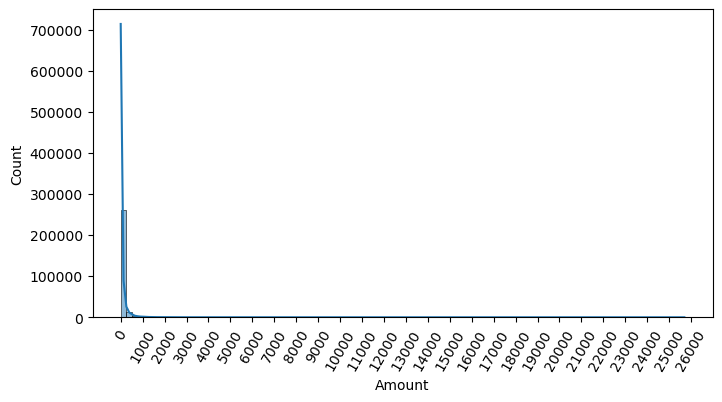

In [12]:
import seaborn as sns
plt.figure(figsize = (8,4))
plt.xticks(range(0,30000,1000), rotation = 60)
sns.histplot(card_df['Amount'], bins = 100, kde = True)
plt.show()

Amount를 정규분포 형태로 변환 후 예측해보기

In [15]:
from sklearn.preprocessing import StandardScaler
#사이킷런의 StandardScaler사용해 정규 분포 형태로 Amount피처값 변환하는 로직으로 수정
def get_processed_df(df=None):
    df_copy = df.copy()
    scaler = StandardSclaer()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    #변환된 Amount를 Amount_scaled로 피처명 변경 후 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_scaled', amount_n)
    #기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
    return df_copy

In [16]:
#Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8585, 재현율: 0.6149, F1: 0.7165, AUC: 0.9736
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


로지스틱회귀의 경우 정밀도와 재현율이 오히려 저하되었고, LightGBM의 경우 큰 성능상의 변경이 없다

로그 변환 수행  
로그 변환은 데이터가 분포도가 심하게 왜곡되어 있을 경우 적용하는 기법  
원래 값을 log로 변환해 큰 값을 상대적으로 작은 값으로 변환하기 때문에 데이터 분포도의 왜곡을 상당 수준 개선  
로그 변환은 넘파이의 log1p()함수를 이용해 변환 가능

In [17]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    #넘파이의 log1p()를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
    return df_copy

In [18]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1: 0.7120, AUC: 0.9734
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1: 0.8496, AUC: 0.9796


로지스틱회귀의 경우 원본 데이터 대비 정밀도는 향상되었으나 재현율은 저하  
LightGBM의 경우 재현율이 향상  
레이블이 극도로 불균일한 데이터셋에서 로지스틱회귀는 데이터 변환 시 약간은 불안정한 성능 결과를 보여주고 있음

## 이상치 데이터 제거 후 모델 학습/예측/평가

이상치: 전체 데이터 패턴에서 벗어난 이상 값을 가진 데이터  
IQR 방식을 적용해 이상치 탐색  
IQR: 사분위 값의 편차를 이용하는 기법으로 박스플롯 방식으로 시각화 가능

사분위: 전체 데이터를 값이 높은 순으로 정렬하고 이를 1/4씩 구간을 분할하는 것  
이들 중 25%구간인 Q1부터 75%구간인 Q3까지의 범위를 IQR이라고 한다(25%~75%)  
보통 IQR에 1.5를 곱해서 생성된 범위를 이용해 최댓값과 최솟값을 결정한 뒤 이를 초과하거나 미달하는 데이터를 이상치로 간주  
보통은 1.5를 적용하나 다른 값도 가능  
IQR을 시각화 한 도표가 박스플롯

매우 많은 피처가 있을 경우 이들 중 결정값과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 좋다  
결정값과 상관성이 높지 않은 피처들의 경우 이상치를 제거해도 크게 성능 향상에 기여하지 않기 때문  
피처별 상관도를 구하고 히트맵으로 시각화

<Axes: >

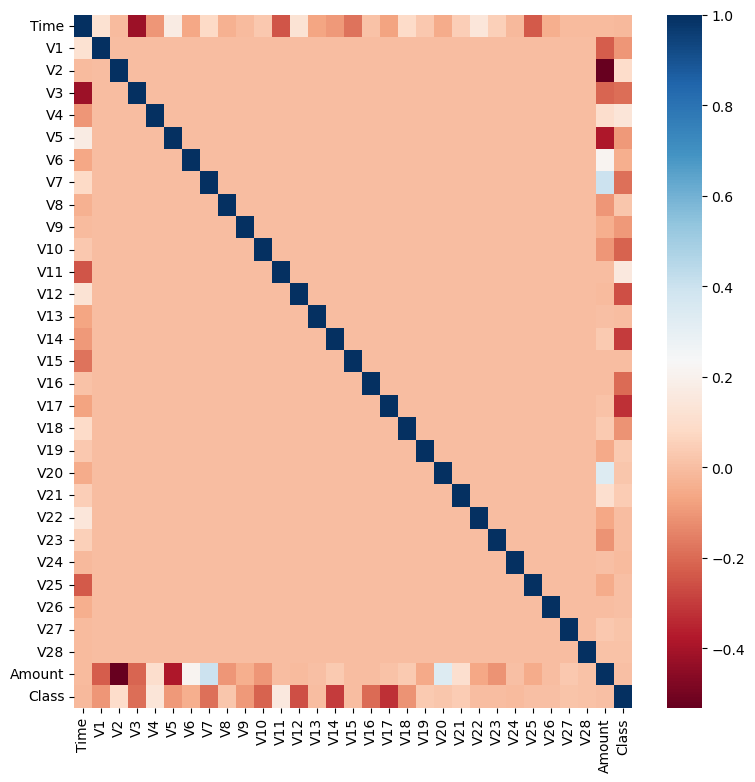

In [20]:
plt.figure(figsize = (9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap = 'RdBu')

값이 진한 파란색에 가까울수록 양의 상관관계, 진한 빨간색에 가까울수록 음의 상관관계  
Class피처과 음의 상관관계가 높은 V14에 대해 이상치 찾아서 제거  
IQR을 이용해 이상치를 검출하는 함수를 생성

In [27]:
import numpy as np
def get_outlier(df = None, column = None, weight = 1.5):
    #fraud에 해당하는 column 데이터만 추출, 1/4분위와 3/4분위 지점을 np.percentile로 구함
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    #IQR을 구하고 IQR에 1.5를 곱해 최댓값과 최솟값 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    #최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 변환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [28]:
outlier_index = get_outlier(df = card_df, column = 'V14', weight = 1.5)
print('이상치 인덱스:', outlier_index)

이상치 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [34]:
#get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df = None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
    #이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df= df_copy, column = 'V14', weight = 1.5)
    df_copy.drop(outlier_index, axis = 0, inplace = True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712, F1: 0.7568, AUC: 0.9725
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC: 0.9780


이상치 데이터 제거 후 두 모델 모두 예측 성능이 크게 향상

## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


In [36]:
lr_clf = LogisticRegression(max_iter = 1000)
#ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 주의
get_model_train_eval(lr_clf, ftr_train = X_train_over, ftr_test = X_test, tgt_train = y_train_over, tgt_test = y_test)

오차 행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0541, 재현율: 0.9247, F1: 0.1022, AUC: 0.9736


재현율을 상승하였으나 정밀도가 5%로 급격하게 하락  
오버샘플링으로 인해 실제 원본 데이터 유형보다 너무나 많은 Class=1데이터를 학습하며 실제 데이터셋에서 예측을 지나치게 1로 적용해 정밀도가 급격히 하락

In [38]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train_over, ftr_test = X_test, tgt_train = y_train_over, tgt_test = y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493, F1: 0.8794, AUC: 0.9814


SMOTE를 적용하면 재현율은 높아지나 정밀도는 낮아지는 것이 일반적  
때문에 재현율 지표를 높이는 것이 머신러닝모델의 주요 목표인 경우 SMOTE를 적용하는 것이 좋다